In [142]:
import numpy as np
import sympy
sympy.init_printing(use_unicode=True)
from sympy import symbols,simplify,diff,latex,Piecewise
from sympy.solvers import solve
from IPython.display import display
from typing import Callable

%matplotlib inline
import matplotlib.pyplot as plt

def simplified(exp, title=None):
    simp = simplify(exp)
    if simplified.LOG:
        if title: display(title,simp)
        else: display(simp)
    return simp
simplified.LOG = False

def firstOrderCondition(exp, var):
    diffExp = simplified(diff(exp, var))
    solutions = solve(diffExp, var)
    if firstOrderCondition.LOG:
        display(solutions)
    return solutions
firstOrderCondition.LOG = False
  
class Result(object):   # a class for holding results of calculations
    def __repr__(self): return self.__dict__.__repr__()
    def display(self):
        for k,v in sorted(self.__dict__.items()):
            display(k,v)

In [143]:
a,p,r,b,vmax,bmin,bmax,beta = symbols('a p r b v_{\max} b_{\min} b_{\max} \\beta', positive=True)
w,T,D,L,n,Supply = symbols('w T \\Delta L n S', positive=True)
D

In [166]:
def exactCostPerDay(T):
    return (a*p + w*b*( (1+r)**T - 1 )) / T

def approxCostPerDay(T):
    return a*p/T + w*b*r

def symmetricLifetime(w):
    return w**2/4/L

def asymmetricLifetime(w):
    return w / D

def uniformCDF(v):
    return v / vmax

def powerlawCDF(v):
    return (1 - 1 / v)


uniformPDF = Piecewise( (1 / bmax , b<bmax), (0, True) )
powerlawPDF =  Piecewise( (0 , b<bmin), (bmin / b**2, True) )

#uniformPDF(b)
display(sympy.integrate(uniformPDF, (b, 0, np.inf)))  # should be 1
display(sympy.integrate(powerlawPDF, (b, 0, np.inf))) # should be 1

In [126]:
def calculateMarketEquilibrium(costPerDay:Callable,channelLifetime:Callable,valueCDF:Callable,wSolutionIndex:int):
    T = simplified(channelLifetime(w), "T")
    CPD = simplified(costPerDay(T), "CPD")
    optimal = Result()
    optimal.w = simplified(firstOrderCondition(CPD,w)[wSolutionIndex], "Optimal channel funding (w)")
    optimal.T   = simplified(T.subs(w,optimal.w), "optimal channel lifetime (T)")
    optimal.CPD = simplified(CPD.subs(w,optimal.w), "Cost-per-day") 
    optimal.RPD = simplified(a / optimal.T, "Potential records per day") 
    optimal.C   =   simplified(optimal.CPD*optimal.T, "Cost between resets") 
    optimal.V   =   simplified(optimal.T*L*beta*b, "Value between resets")
    optimal.VCR1 = 1
    optimal.VCR2 = simplified(optimal.V / optimal.C, "Value/Cost Ratio of lightning")
    optimal.VCR3 = simplified(beta*b / p, "Value/Cost Ratio of blockchain")
    optimal.b12  = simplified(solve(optimal.VCR1-optimal.VCR2,b)[0],"b of indifference between nop and lightning")
    optimal.b13  = simplified(solve(optimal.VCR1-optimal.VCR3,b)[0],"b of indifference between nop and blockchain")
    optimal.b23  = simplified(solve(optimal.VCR2-optimal.VCR3,b)[0],"b of indifference between blockchain and lightning")
    optimal.DemandLightningCondition = simplified(optimal.T*L - optimal.C/p,"demand lightning condition")
    optimal.thresholdPrice = simplified(solve(optimal.DemandLightningCondition, p)[0], "p")
    optimal.DemandLightning = simplified(n*(1-valueCDF(2*a*p / optimal.T/L)) * (a / optimal.T),"demand lightning")
    optimal.eqPriceLightning = simplified(solve(optimal.DemandLightning-Supply, p)[0], "p")
    optimal.DemandBlockchain = simplified(n*(1-valueCDF(p))*L, "demand blockchain")
    optimal.eqPriceBlockchain = simplified(solve(optimal.DemandBlockchain-Supply, p)[0], "p")
    return optimal

In [127]:
simplified.LOG = False
firstOrderCondition.LOG = False
asymmetricSolution = calculateMarketEquilibrium(approxCostPerDay,asymmetricLifetime,uniformCDF,wSolutionIndex=0)

'C'

'CPD'

'DemandBlockchain'

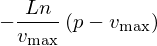

'DemandLightning'

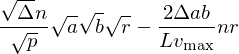

'DemandLightningCondition'

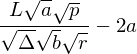

'RPD'

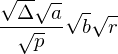

'T'

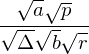

'V'

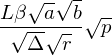

'VCR1'

'VCR2'

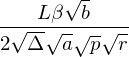

'VCR3'

'b12'

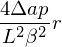

'b13'

'b23'

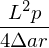

'eqPriceBlockchain'

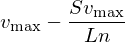

'eqPriceLightning'

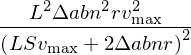

'thresholdPrice'

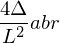

'w'

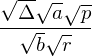

In [128]:
asymmetricSolution.display()

In [130]:
params = {
    L: 10,           # total transfers per day 
    D: 4,            # delta transfers per day 
    beta: 0.01,      # value as fraction of tx size
    r: 0.5/100/365,  # interest rate per day
    a: 1.1,          # records per reset tx
}
(asymmetricSolution.b12.subs(params),
asymmetricSolution.b13.subs(params),
asymmetricSolution.b23.subs(params))

In [135]:
sympy.integrate(asymmetricSolution, )

<function sympy.integrals.integrals.integrate>

In [123]:
simplified.LOG = False
firstOrderCondition.LOG = False
symmetricSolution = calculateMarketEquilibrium(approxCostPerDay,symmetricLifetime,uniformCDF,wSolutionIndex=0)

'C'

'CPD'

'DemandBlockchain'

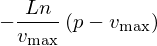

'DemandLightning'

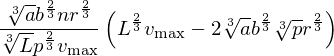

'DemandLightningCondition'

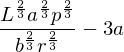

'T'

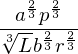

'V'

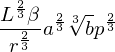

'VCR1'

'VCR2'

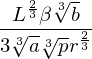

'VCR3'

'b12'

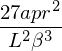

'b13'

'b23'

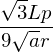

'eqPriceBlockchain'

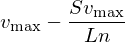

'eqPriceLightning'

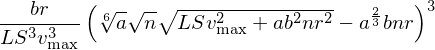

'thresholdPrice'

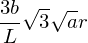

'w'

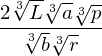

In [124]:
symmetricSolution.display()

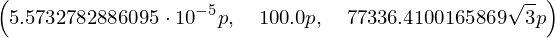

In [125]:
(symmetricSolution.b12.subs(params),
symmetricSolution.b13.subs(params),
symmetricSolution.b23.subs(params))